In [2234]:
# Import dependencies and data

import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel


df = pd.read_csv('https://raw.githubusercontent.com/bmewing/technical_assessment/master/data.csv')

df

,Origin City,Origin State,Destination City,Destination State,Route Class,Priority,Distance,Cost
0,ANNISTON,AL,BAYPORT,TX,Red,1,808,3105.12
1,ANNISTON,AL,HOUSTON,TX,Green,1,779,3357.28
2,MAGNESS,AR,KINGSPORT,TN,Green,2,657,2670.23
3,MAGNESS,AR,BAYPORT,TX,Red,1,610,2715.14
4,VERNON,CA,HARPERTOWN,CA,Red,1,235,2241.49
...,...,...,...,...,...,...,...,...
301,HERCULES,VA,GURNEE,IL,Red,1,1060,3587.94
302,HERCULES,VA,ALERT,FL,Red,1,806,5525.39
303,HERCULES,VA,LA PORTE,TX,Green,1,1431,4653.60
304,KALAMA,WA,WORTON,MD,Green,2,3117,8172.43


In [2235]:
# DATA PREPROCESSING
# Combine Origin and Destination for simplicity

df["Origin"] = df[["Origin City", "Origin State"]].apply(", ".join, axis=1)
df["Destination"] = df[["Destination City", "Destination State"]].apply(", ".join, axis=1)
df = df.drop(['Origin City', 'Origin State', 'Destination State', 'Destination City'], axis=1)
df

,Route Class,Priority,Distance,Cost,Origin,Destination
0,Red,1,808,3105.12,"ANNISTON, AL","BAYPORT, TX"
1,Green,1,779,3357.28,"ANNISTON, AL","HOUSTON, TX"
2,Green,2,657,2670.23,"MAGNESS, AR","KINGSPORT, TN"
3,Red,1,610,2715.14,"MAGNESS, AR","BAYPORT, TX"
4,Red,1,235,2241.49,"VERNON, CA","HARPERTOWN, CA"
...,...,...,...,...,...,...
301,Red,1,1060,3587.94,"HERCULES, VA","GURNEE, IL"
302,Red,1,806,5525.39,"HERCULES, VA","ALERT, FL"
303,Green,1,1431,4653.60,"HERCULES, VA","LA PORTE, TX"
304,Green,2,3117,8172.43,"KALAMA, WA","WORTON, MD"


In [2236]:
# Drop rows that have any null values
df = df.dropna()
df

,Route Class,Priority,Distance,Cost,Origin,Destination
0,Red,1,808,3105.12,"ANNISTON, AL","BAYPORT, TX"
1,Green,1,779,3357.28,"ANNISTON, AL","HOUSTON, TX"
2,Green,2,657,2670.23,"MAGNESS, AR","KINGSPORT, TN"
3,Red,1,610,2715.14,"MAGNESS, AR","BAYPORT, TX"
4,Red,1,235,2241.49,"VERNON, CA","HARPERTOWN, CA"
...,...,...,...,...,...,...
301,Red,1,1060,3587.94,"HERCULES, VA","GURNEE, IL"
302,Red,1,806,5525.39,"HERCULES, VA","ALERT, FL"
303,Green,1,1431,4653.60,"HERCULES, VA","LA PORTE, TX"
304,Green,2,3117,8172.43,"KALAMA, WA","WORTON, MD"


In [2237]:
# Validate data types
df.dtypes

Route Class     object
Priority         int64
Distance         int64
Cost           float64
Origin          object
Destination     object
dtype: object

In [2238]:
# Visualize value counts
df['Route Class'].value_counts()

Blue     113
Red      112
Green     81
Name: Route Class, dtype: int64

In [2239]:
# Visualiz value counts
df['Priority'].value_counts()

1     267
2      29
3       6
4       2
10      1
5       1
Name: Priority, dtype: int64

In [2240]:
# Visualiz value counts
df['Origin'].value_counts()

KINGSPORT, TN          130
LONGVIEW, TX           102
TEXAS CITY, TX           8
EASTMAN, SC              8
PLAQUEMINE, LA           7
BAYPORT, TX              6
BROWNSVILLE, TN          5
WEST ELIZABETH, PA       4
HERCULES, VA             3
TAFT, LA                 3
CHOCOLATE BAYOU, TX      3
DEER PARK, TX            2
MAGNESS, AR              2
ANNISTON, AL             2
STRANG, TX               2
WORTON, MD               2
GALENA PARK, TX          1
HOUSTON, TX              1
BISHOP, TX               1
VIOLA, TX                1
KALAMA, WA               1
CHARLESTON, SC           1
PORT NEWARK, NJ          1
WILMINGTON, NC           1
NEUSE, NC                1
MONROE, NC               1
ST ROSE, LA              1
BATON ROUGE, LA          1
CHICAGO HEIGHTS, IL      1
ARGO, IL                 1
GRACEWOOD, GA            1
VERNON, CA               1
KENT, WA                 1
Name: Origin, dtype: int64

In [2241]:
# Convert Priority to string because it makes more sense for this feature to be an object rather than value later when we perform one-hot encoding
df['Priority']= df['Priority'].map(str)
df.dtypes


Route Class     object
Priority        object
Distance         int64
Cost           float64
Origin          object
Destination     object
dtype: object

In [2242]:
# Selecting for features and target variables
X = df.drop(['Cost'], axis=1)
y = df['Cost']


In [2243]:
# Create dummy variables for features with text values (one-hot)

X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy

,Distance,Route Class_Green,Route Class_Red,Priority_10,Priority_2,Priority_3,Priority_4,Priority_5,"Origin_ARGO, IL","Origin_BATON ROUGE, LA",...,"Destination_VERNON, CA","Destination_WASHINGTON, WV","Destination_WELLSBORO, PA","Destination_WEST ELIZABETH, PA","Destination_WHEELING, IL","Destination_WILMINGTON, NC","Destination_WINNIPEG, MB","Destination_WOODS CROSS, UT","Destination_WORTON, MD","Destination_WYANDOTTE, MI"
0,808,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,779,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,657,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,610,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,235,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1060,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,806,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,1431,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,3117,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2244]:
# Split and standardize dataset for preparation to be run into models next.
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, random_state=8)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]
#X_train_scaled


In [2245]:
# for col in X.columns:
#     print(col)
#     plt.scatter(X[col], y)
#     plt.show()

In [2246]:
# TESTING & TESTING DATA
# Create function to test various models with prepared data from above and print statistical results.
# Additionally, printing bar charts of model coefficients to visualize weights of each feature for each model.

def test_model(model, data):
    reg = model.fit(X_train_scaled, y_train)
    predicted = model.predict(X_train_scaled)
    # Score the prediction with MSE and R2
    mse = mean_squared_error(y_train, predicted)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}')
    print(f"mean squared error (MSE): {mse}\n")
    plt.bar(X_dummy.columns, model.coef_)
    plt.show()  

Model: LinearRegression
Train score: 0.9444113705128782
Test Score: -2.0058558963112346e+26
mean squared error (MSE): 113228.34385401005



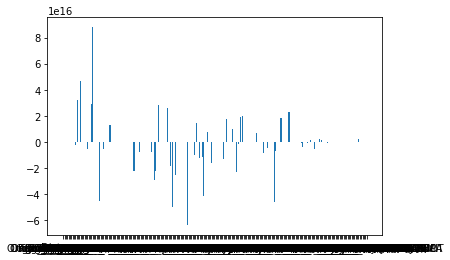

Model: Lasso
Train score: 0.9803368158119251
Test Score: 0.7519618987965059
mean squared error (MSE): 40051.89192562969



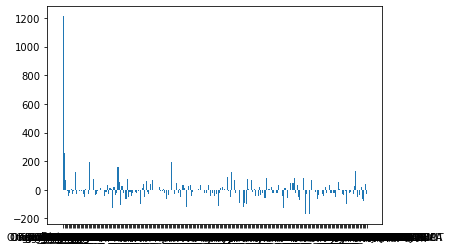

Model: Ridge
Train score: 0.9816303039176644
Test Score: 0.6875120982968753
mean squared error (MSE): 37417.18915711396



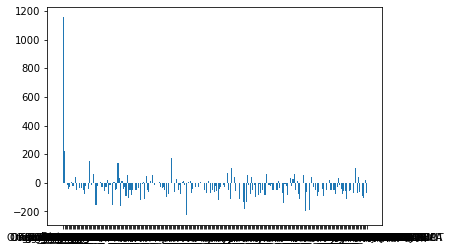

Model: ElasticNet
Train score: 0.9079123684975942
Test Score: 0.5668241640553486
mean squared error (MSE): 187573.0720591227



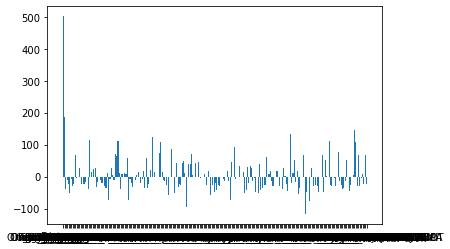

In [2247]:
test_model(LinearRegression(), data)
test_model(Lasso(), data)
test_model(Ridge(), data)
test_model(ElasticNet(), data)

In [2248]:
# Hyperparameter optimiztion
# Chose Lasso since it had the best train & test score.  Lasso minimizes noise the best.
# Next, using GridSearchCV to optimize selected hyperparameters for the Lasso model.
model = Lasso().fit(X_train_scaled, y_train)

lasso_param_grid = {
    'alpha': [1, 2, 3, 4, 5, 10, 50, 100, 1000, 10000],
    'max_iter': [1000, 5000, 10000]
}

grid_reg = GridSearchCV(model, lasso_param_grid, verbose=3)

grid_reg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............alpha=1, max_iter=1000;, score=0.698 total time=   0.0s
[CV 2/5] END ............alpha=1, max_iter=1000;, score=0.673 total time=   0.0s
[CV 3/5] END ............alpha=1, max_iter=1000;, score=0.610 total time=   0.0s
[CV 4/5] END ............alpha=1, max_iter=1000;, score=0.529 total time=   0.0s
[CV 5/5] END ............alpha=1, max_iter=1000;, score=0.757 total time=   0.0s
[CV 1/5] END ............alpha=1, max_iter=5000;, score=0.698 total time=   0.0s
[CV 2/5] END ............alpha=1, max_iter=5000;, score=0.673 total time=   0.0s
[CV 3/5] END ............alpha=1, max_iter=5000;, score=0.610 total time=   0.0s
[CV 4/5] END ............alpha=1, max_iter=5000;, score=0.529 total time=   0.0s
[CV 5/5] END ............alpha=1, max_iter=5000;, score=0.757 total time=   0.0s
[CV 1/5] END ...........alpha=1, max_iter=10000;, score=0.698 total time=   0.0s
[CV 2/5] END ...........alpha=1, max_iter=10000

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 50, 100, 1000, 10000],
                         'max_iter': [1000, 5000, 10000]},
             verbose=3)

In [2249]:
print(grid_reg.best_params_)
print(grid_reg.best_score_)

{'alpha': 50, 'max_iter': 1000}
0.7281205634474639


In [2250]:
# Defining function to test various ensemble method regressors and printing statistical results.

def test_ensemble(model, data):
    reg = model.fit(X_train_scaled, y_train)
    predicted = model.predict(X_train_scaled)
    # Score the prediction with MSE and R2
    mse = mean_squared_error(y_train, predicted)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}')
    print(f"mean squared error (MSE): {mse}\n")
    plt.show()  

In [2251]:
test_ensemble(BaggingRegressor(), data)
test_ensemble(AdaBoostRegressor(), data)
test_ensemble(RandomForestRegressor(), data)



Model: BaggingRegressor
Train score: 0.9553047889258968
Test Score: 0.8004610286736872
mean squared error (MSE): 91039.56645123866

Model: AdaBoostRegressor
Train score: 0.8289691580022369
Test Score: 0.756381098958561
mean squared error (MSE): 348372.30502057937

Model: RandomForestRegressor
Train score: 0.968158197499695
Test Score: 0.7902127369925689
mean squared error (MSE): 64858.48986925045



In [2252]:
# Its pretty much a toss-up between Bagging or RandomForest, so I decided to choose RandomForest since it has a slightly lower MSE.
# Again, using GridSearchCV to optimize selected hyperparameters.
model = RandomForestRegressor().fit(X_train_scaled, y_train)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'bootstrap': [True, False],
}

grid_reg = GridSearchCV(model, param_grid, verbose=3)

grid_reg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..bootstrap=True, n_estimators=100;, score=0.755 total time=   0.2s
[CV 2/5] END ..bootstrap=True, n_estimators=100;, score=0.748 total time=   0.2s
[CV 3/5] END ..bootstrap=True, n_estimators=100;, score=0.633 total time=   0.2s
[CV 4/5] END ..bootstrap=True, n_estimators=100;, score=0.649 total time=   0.2s
[CV 5/5] END ..bootstrap=True, n_estimators=100;, score=0.846 total time=   0.2s
[CV 1/5] END ..bootstrap=True, n_estimators=200;, score=0.764 total time=   0.4s
[CV 2/5] END ..bootstrap=True, n_estimators=200;, score=0.735 total time=   0.4s
[CV 3/5] END ..bootstrap=True, n_estimators=200;, score=0.643 total time=   0.4s
[CV 4/5] END ..bootstrap=True, n_estimators=200;, score=0.656 total time=   0.4s
[CV 5/5] END ..bootstrap=True, n_estimators=200;, score=0.841 total time=   0.4s
[CV 1/5] END ..bootstrap=True, n_estimators=300;, score=0.760 total time=   0.6s
[CV 2/5] END ..bootstrap=True, n_estimators=300;

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [2253]:
print(grid_reg.best_params_)
print(grid_reg.best_score_)

{'bootstrap': True, 'n_estimators': 200}
0.7276265392419574


In [2254]:
# Plugging in best parameters from GridSearchCV results from above to run RandomForest and get final answer. No significant change in result.

best_reg_model = RandomForestRegressor(bootstrap=True, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Train score: {best_reg_model.score(X_train_scaled, y_train)}')
print(f'Test Score: {best_reg_model.score(X_test_scaled, y_test)}')

Train score: 0.9687304862580649
Test Score: 0.7858373973071356


k: 1, Train/Test Score: 0.998/-0.144
k: 3, Train/Test Score: 0.483/-0.149
k: 5, Train/Test Score: 0.263/-0.091
k: 7, Train/Test Score: 0.175/-0.078
k: 9, Train/Test Score: 0.195/-0.050
k: 11, Train/Test Score: 0.193/-0.000
k: 13, Train/Test Score: 0.217/0.058
k: 15, Train/Test Score: 0.200/0.068
k: 17, Train/Test Score: 0.173/0.071
k: 19, Train/Test Score: 0.162/0.083


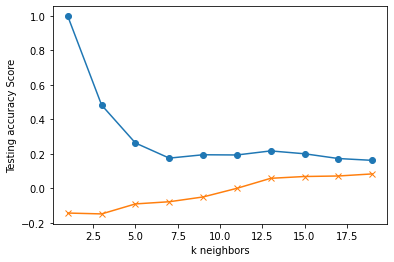

In [2255]:
# Loop to test KNN regressor model.  Terrible.

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [2256]:
# Defining regressor to be used in the next steps with hyperparamater optimization.
reg = Lasso(alpha=50, max_iter=1000).fit(X_train_scaled, y_train)

In [2257]:
# Now that Lasso with optimized hyperparameters are established, feature selection from Lasso will be inserted into the regression models to 
# see if it improves the scores.

sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_dummy), y, random_state=8)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)
data = [X_selected_train_scaled, X_selected_test_scaled, y_train, y_test]

In [2258]:
# Defining function for running models with Lasso feature selection.

def test_selected_ensemble(model, data):
    reg = model.fit(X_selected_train_scaled, y_train)
    predicted = reg.predict(X_selected_train_scaled)
    # Score the prediction with MSE and R2
    mse = mean_squared_error(y_train, predicted)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_selected_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_selected_test_scaled, y_test)}')
    print(f"mean squared error (MSE): {mse}\n")

In [2259]:
# Re-running models with selected features from Lasso and optimized hyperparameter for BaggingRegressor from previous steps.
# No significant improvement, except that the LinearRegrsion model improved significantly.

test_selected_ensemble(BaggingRegressor(n_estimators=200), data)
test_selected_ensemble(AdaBoostRegressor(), data)
test_selected_ensemble(RandomForestRegressor(), data)
test_selected_ensemble(LinearRegression(), data)

Model: BaggingRegressor
Train score: 0.9655619111042348
Test Score: 0.7906970730199092
mean squared error (MSE): 70146.85929733208

Model: AdaBoostRegressor
Train score: 0.809179547364868
Test Score: 0.701575156205269
mean squared error (MSE): 388681.7146724957

Model: RandomForestRegressor
Train score: 0.9672913175307176
Test Score: 0.7874308905433828
mean squared error (MSE): 66624.23556424485

Model: LinearRegression
Train score: 0.9385683386072663
Test Score: 0.7883395701600513
mean squared error (MSE): 125130.00129479727



k: 1, Train/Test Score: 0.996/0.637
k: 3, Train/Test Score: 0.873/0.745
k: 5, Train/Test Score: 0.832/0.734
k: 7, Train/Test Score: 0.794/0.714
k: 9, Train/Test Score: 0.751/0.691
k: 11, Train/Test Score: 0.716/0.655
k: 13, Train/Test Score: 0.683/0.617
k: 15, Train/Test Score: 0.660/0.574
k: 17, Train/Test Score: 0.640/0.554
k: 19, Train/Test Score: 0.620/0.532


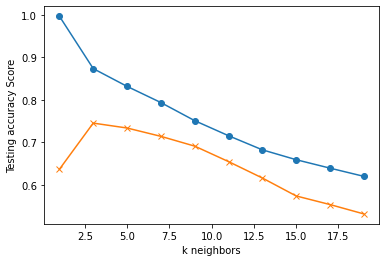

In [2260]:
# Lasso model feature selection significantly improves the KNN regressor, however this model is still not the best.

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_selected_train_scaled, y_train)
    train_score = knn.score(X_selected_train_scaled, y_train)
    test_score = knn.score(X_selected_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [2261]:
# OUTLIER ANALYSIS

# Put origins into a list for for loop (and later for plot labels)
origins = ["KINGSPORT, TN", "LONGVIEW, TX", "TEXAS CITY, TX", "EASTMAN, SC", "PLAQUEMINE, LA"]

# Create empty list to fill with costs and origin (for plotting)
cost = []
origin1 = []
origin2 = []
origin3 = []
origin4 = []
origin5 = []

# Loop to append cost data with each origin from the list (Top 5) defined above
for origin in origins:
    cost.append(df.loc[df['Origin'] == origin, :])

# Separate lists to hold data for each origin separately to be used in next step
origin1 = cost[0]['Cost']
origin2 = cost[1]['Cost']
origin3 = cost[2]['Cost']
origin4 = cost[3]['Cost']
origin5 = cost[4]['Cost']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each origin in list and perform calculations and print the results
for origin in origins:
    quartiles = df.loc[df['Origin'] == origin, :]['Cost'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {origin} is: {lowerq}")
    print(f"The upper quartile of {origin} is: {upperq}")
    print(f"The interquartile range of {origin} is: {iqr}")
    print(f"The the median of {origin} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of KINGSPORT, TN is: 2449.5725
The upper quartile of KINGSPORT, TN is: 3887.87
The interquartile range of KINGSPORT, TN is: 1438.2974999999997
The the median of KINGSPORT, TN is: 3042.635 
Values below 292.1262500000007 could be outliers.
Values above 6045.31625 could be outliers.
The lower quartile of LONGVIEW, TX is: 2155.34
The upper quartile of LONGVIEW, TX is: 4089.2825
The interquartile range of LONGVIEW, TX is: 1933.9424999999997
The the median of LONGVIEW, TX is: 3111.33 
Values below -745.5737499999996 could be outliers.
Values above 6990.196249999999 could be outliers.
The lower quartile of TEXAS CITY, TX is: 1599.2125
The upper quartile of TEXAS CITY, TX is: 2013.24
The interquartile range of TEXAS CITY, TX is: 414.0274999999999
The the median of TEXAS CITY, TX is: 1751.3600000000001 
Values below 978.1712500000002 could be outliers.
Values above 2634.28125 could be outliers.
The lower quartile of EASTMAN, SC is: 1671.185
The upper quartile of EASTMAN, SC 

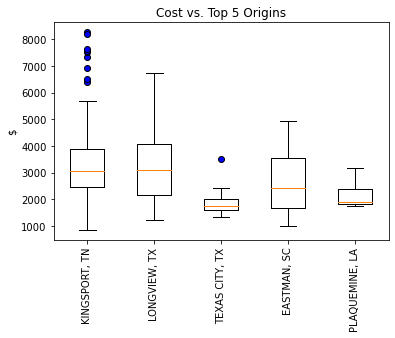

In [2262]:
# Generate a box plot of the final cost for the top 5 origins
fig1, ax1 = plt.subplots()
ax1.set_title('Cost vs. Top 5 Origins')
ax1.set_ylabel('$')
# Plots all 5 boxes plus highlights the outlier in specified color
ax1.boxplot([origin1, origin2, origin3, origin4, origin5], flierprops={'markerfacecolor':'b'})
# Renames x axis for origins within origins list
plt.xticks([1,2,3,4,5], origins, rotation = 90)
plt.show()

In [2263]:
# The following steps are the same as above, however experimenting with filtering the dataframe, essentially manually performing the Lasso process.

df_filtered = df[(df['Origin'] == 'KINGSPORT, TN') | (df['Origin'] == 'LONGVIEW, TX')]
df_filtered = df_filtered[(df_filtered['Priority'] == '1') | (df_filtered['Priority'] == '2')]
df_filtered



,Route Class,Priority,Distance,Cost,Origin,Destination
47,Green,2,742,2068.29,"KINGSPORT, TN","ARGO, IL"
48,Blue,2,944,2859.76,"KINGSPORT, TN","LONGVIEW, TX"
49,Blue,2,1122,3177.31,"KINGSPORT, TN","TEXAS CITY, TX"
50,Red,2,700,2939.49,"KINGSPORT, TN","NIAGARA FALLS, NY"
51,Red,2,409,2653.45,"KINGSPORT, TN","NEUSE, NC"
...,...,...,...,...,...,...
285,Red,1,426,1992.36,"LONGVIEW, TX","HALE, TX"
286,Green,1,1170,4595.91,"LONGVIEW, TX","EAST TAMPA, FL"
287,Green,1,792,3118.02,"LONGVIEW, TX","COLUMBUS, GA"
288,Red,1,835,2688.36,"LONGVIEW, TX","FRONTIER, KS"


In [2264]:
X = df_filtered.drop(['Cost', 'Destination'], axis=1)
y = df_filtered['Cost']

In [2265]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy

,Distance,Route Class_Green,Route Class_Red,Priority_2,"Origin_LONGVIEW, TX"
47,742,1,0,1,0
48,944,0,0,1,0
49,1122,0,0,1,0
50,700,0,1,1,0
51,409,0,1,1,0
...,...,...,...,...,...
285,426,0,1,0,1
286,1170,1,0,0,1
287,792,1,0,0,1
288,835,0,1,0,1


In [2266]:
# Standardize dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, random_state=8)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]
#X_train_scaled

In [2267]:
def test_model(model, data):
    reg = model.fit(X_train_scaled, y_train)
    predicted = model.predict(X_train_scaled)
    # Score the prediction with MSE and R2
    mse = mean_squared_error(y_train, predicted)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}')
    print(f"mean squared error (MSE): {mse}\n")
    plt.bar(X_dummy.columns, model.coef_)
    plt.xticks(rotation = 90)
    plt.show()    

Model: LinearRegression
Train score: 0.7934686612774533
Test Score: 0.7048253918343861
mean squared error (MSE): 434598.8154622357



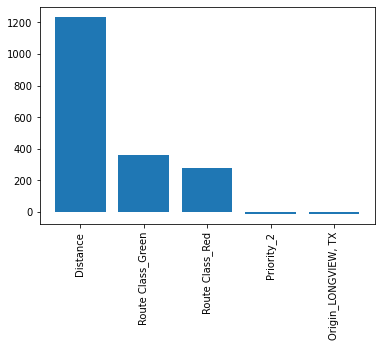

Model: Lasso
Train score: 0.7873278449041426
Test Score: 0.6892502728366989
mean squared error (MSE): 447520.78429427405



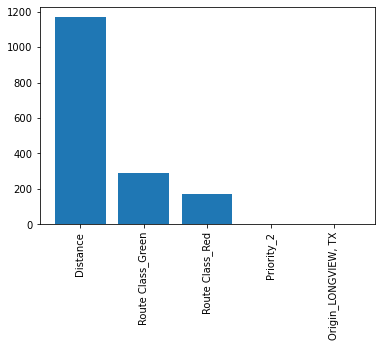

Model: Ridge
Train score: 0.7934310188157698
Test Score: 0.7033211679456495
mean squared error (MSE): 434678.0255683625



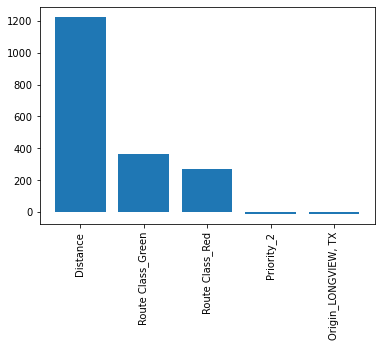

Model: ElasticNet
Train score: 0.7007293276598798
Test Score: 0.5339491265686627
mean squared error (MSE): 629747.913832722



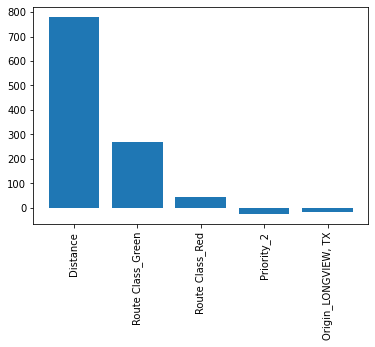

In [2268]:
test_model(LinearRegression(), data)
test_model(Lasso(alpha=50), data)
test_model(Ridge(), data)
test_model(ElasticNet(), data)


In [2269]:
def test_ensemble(model, data):
    reg = model.fit(X_train_scaled, y_train)
    predicted = model.predict(X_train_scaled)
    # Score the prediction with MSE and R2
    mse = mean_squared_error(y_train, predicted)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}')
    print(f"mean squared error (MSE): {mse}\n")
    plt.show()  

In [2270]:
test_ensemble(BaggingRegressor(), data)
test_ensemble(AdaBoostRegressor(), data)
test_ensemble(RandomForestRegressor(), data)

Model: BaggingRegressor
Train score: 0.9480716218328368
Test Score: 0.6169050393587779
mean squared error (MSE): 109271.60875397192

Model: AdaBoostRegressor
Train score: 0.8252055102216228
Test Score: 0.6477992942051947
mean squared error (MSE): 367815.7449463894

Model: RandomForestRegressor
Train score: 0.9635659437688856
Test Score: 0.6453330962526977
mean squared error (MSE): 76667.2882598141



k: 1, Train/Test Score: 0.998/0.458
k: 3, Train/Test Score: 0.858/0.591
k: 5, Train/Test Score: 0.812/0.543
k: 7, Train/Test Score: 0.789/0.501
k: 9, Train/Test Score: 0.778/0.482
k: 11, Train/Test Score: 0.760/0.490
k: 13, Train/Test Score: 0.738/0.500
k: 15, Train/Test Score: 0.723/0.498
k: 17, Train/Test Score: 0.691/0.461
k: 19, Train/Test Score: 0.657/0.400


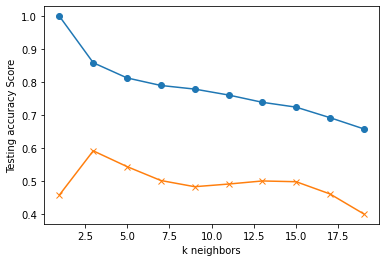

In [2271]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [2272]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.543
